In [2]:
import scipy
from scipy import stats

## One Sample T test

We use a one sample T-test to determine whether our sample mean (observed average) is statistically significantly different to the population mean (expected average).

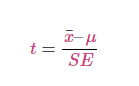



Where x¯ is the sample mean, μ is the population mean and the standard error is:
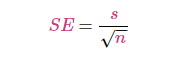

## Example

* Let’s say we want to calculate the resting systolic blood pressure of 20 first-year resident female doctors and compare it to the general public population mean of 120 mmHg.

The null hypothesis is that there is no significant difference between the blood pressure of the resident female doctors and the general population.

In [3]:
# sample of blood pressure of 20 female doctors
female_doctor_bps = [128, 127, 118, 115, 144, 142, 133, 140, 132, 131, 
                     111, 132, 149, 122, 139, 119, 136, 129, 126, 128]
stats.ttest_1samp(female_doctor_bps, 120)

Ttest_1sampResult(statistic=4.512403659336718, pvalue=0.00023838063630967753)

Our t-statistic value is 4.512, and along with our degrees of freedom (n-1; 19) this can be used to calculate a p-value.

The p-value in this case is 0.0002, which is far less than the standard thresholds of 0.05 or 0.01, so we reject the null hypothesis and we can say there is a statistically significant difference between the resting systolic blood pressure of the resident female doctors and the general population.

## Two Sample T Test

A two sample T-test is used to compare the means of two separate samples.

It is calculated as follows (assuming equal variances)

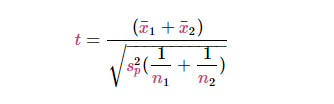

Where s2p is the pooled variance, calculated as follows:
  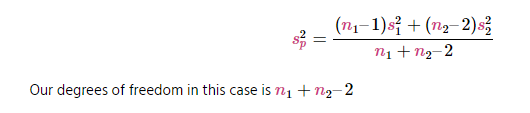  

## Example

* Let’s look at an example to compare the blood pressure of male consultant doctors with the junior resident female doctors we explored above.

Our null hypothesis in this case is that there is no statistically significant difference in the mean of male consulting doctors and junior resident female doctors.

* Scipy implements this as ttest_ind()

In [5]:
female_doctor_bps = [128, 127, 118, 115, 144, 142, 133, 140, 132, 131, 
                     111, 132, 149, 122, 139, 119, 136, 129, 126, 128]

male_consultant_bps = [118, 115, 112, 120, 124, 130, 123, 110, 120, 121,
                      123, 125, 129, 130, 112, 117, 119, 120, 123, 128]

stats.ttest_ind(female_doctor_bps, male_consultant_bps)

Ttest_indResult(statistic=3.5143256412718564, pvalue=0.0011571376404026158)

Our t-statistic value is 3.514, and along with our degrees of freedom (38) this can be used to calculate a p-value.

The p-value in this case is 0.0012, which again is below than the standard thresholds of 0.05 or 0.01, so we reject the null hypothesis and we can say there is a statistically significant difference between the resting systolic blood pressure of the resident female doctors and the male consultant doctors.

## Paired T Test

Previously the observations in our two samples have been completely independent of one another.

Perhaps we want to compare two related samples, e.g. a before and after test, we might use a paired T-test.

This is calculated as follows:
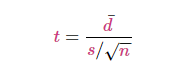
Where d¯ is the average difference between the paired samples. The degrees of freedom is n−1.

## Example

* We will measure the amount of sleep got by patients before and after taking soporific drugs to help them sleep.

* The null hypothesis is that the soporific drug has no effect on the sleep duration of the patients.

* Scipy implements the paired t-test as ttest_rel()

In [6]:
control = [8.0, 7.1, 6.5, 6.7, 7.2, 5.4, 4.7, 8.1, 6.3, 4.8]
treatment = [9.9, 7.9, 7.6, 6.8, 7.1, 9.9, 10.5, 9.7, 10.9, 8.2]

stats.ttest_rel(control, treatment)

Ttest_relResult(statistic=-3.6244859951782136, pvalue=0.0055329408161001415)

Our t-statistic value is -3.624, and along with our degrees of freedom (9) this can be used to calculate a p-value.

The p-value is 0.0055, which again is below than the standard thresholds of 0.05 or 0.01, so we reject the null hypothesis and we can say there is a statistically significant difference in sleep duration caused by the soporific drug.

## Analysis of Variance (ANOVA)

* ANOVA is used to compare the means of three or more samples.

* While you could do multiple T-tests, as you increase the numbers of T-tests you do, you are more likely to encounter a Type I error. If you have a p value of 0.05 for each T-test, once you have run three T-tests, your p is effectively 0.143. ANOVA controls for this error such that the Type I error rate remains at 5%.

```An ANOVA will provide an F-statistic which can, along with degrees of freedom, be used to calculate a p value.```

* ANOVAs assume independence of observations, homogeneity of variances and normally distributed observations within groups.

* This is implemented in scipy by as f_oneway().

## Example

We will use R’s Plant Growth Data Set for our ANOVA.

The null hypothesis is that there is no difference between the means of the weights of dried plants under control and 2 different treatment conditions.

In [8]:
ctrl = [4.17, 5.58, 5.18, 6.11, 4.5, 4.61, 5.17, 4.53, 5.33, 5.14]
trt1 = [4.81, 4.17, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69]
trt2 = [6.31, 5.12, 5.54, 5.5, 5.37, 5.29, 4.92, 6.15, 5.8, 5.26]

stats.f_oneway(ctrl, trt1, trt2)

F_onewayResult(statistic=4.846087862380136, pvalue=0.0159099583256229)

We report this using the degrees of freedom (between), which is k-1, and the degrees of freedom within, which is N-k.

So we report the result of our ANOVA as (F(2, 27), p=0.016).

As p < 0.05, we can reject the null hypothesis that there is no difference between the means of the weights of dried plants under control and each of the 2 different treatment conditions.